# Comparing cell states

The purpose of this notebook is to compare the cell states for different examples. By this I mean taking the plots I generate, and instead looking at them numerically.

In [22]:
import numpy as np
from pathlib import Path
import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt

## Load an example

In [11]:
class Config:
    n_terms = 4
    n_digits = 2

In [12]:
cell_state_dir = Path(f'../Code/experiments/cell_states/{Config.n_terms}term_{Config.n_digits}dig')
cell_states = np.load(cell_state_dir / Path('cell_states.npy'), allow_pickle=True)
print(f'{cell_states.shape[0]} samples, each with shape {cell_states.shape[1:]}')

input_seqs = []
with open(cell_state_dir / Path('input.csv')) as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        # When reading back the file it doesn't record the newline, so include it
        input_seqs.append(row[-1] + '\n')

100 samples, each with shape (12, 32)


In [13]:
print(f'Working with {input_seqs[0]}')
cell_df = pd.DataFrame(cell_states[0])

Working with 47+11+72+14



In [16]:
cell_df.columns = [f'Cell {x}' for x in cell_df.columns]
cell_df

,Cell 0,Cell 1,Cell 2,Cell 3,Cell 4,Cell 5,Cell 6,Cell 7,Cell 8,Cell 9,...,Cell 22,Cell 23,Cell 24,Cell 25,Cell 26,Cell 27,Cell 28,Cell 29,Cell 30,Cell 31
0,0.994418,1.345551,1.223066,0.815367,-1.000922,1.545860,-0.753236,-2.443813,4.033574,0.123252,...,-0.813864,-4.726855,1.037022,-0.824150,1.596112,0.277344,-4.944099,-0.147814,0.004651,-1.001037
1,0.496200,1.604027,0.010807,-0.808951,0.444953,1.606274,0.053354,-1.502161,4.691805,0.527876,...,-0.759464,-4.542577,-0.276465,-0.866452,2.416974,-0.568208,-5.837554,-0.315057,0.463674,-1.171262
2,0.941615,1.921339,0.984816,-0.886610,-0.533524,1.093618,0.815379,-1.630352,5.343708,0.130209,...,-0.431641,-4.481818,0.994161,-0.589239,3.080487,-1.180922,-5.240484,-0.256646,0.331580,-0.998486
3,0.974130,1.592420,1.047212,-1.043444,-1.003774,0.647514,0.982589,-1.951515,5.518471,0.007035,...,-0.729341,-4.192081,1.004124,-0.571382,2.592082,-0.159090,-6.137826,-0.190349,0.262683,-1.044293
4,0.953019,1.313326,1.005322,-1.342360,-0.212607,0.413779,-0.159872,-2.207428,5.544555,0.000466,...,-0.980547,-2.891256,1.000200,-0.537159,2.676991,-0.926999,-6.799202,-0.132807,0.356297,-1.009508
5,0.893036,1.693354,0.888694,-1.877698,-0.697839,0.360254,-0.160022,-2.146401,4.867734,0.060302,...,-0.549985,-2.627066,0.965510,-0.493197,3.279408,-1.185121,-2.955648,-0.128111,-0.061923,-1.016873
6,0.302410,1.719748,-0.928150,-2.621977,0.536477,0.443515,-0.104375,-1.496854,5.014725,0.731199,...,-0.832107,-3.124892,0.921297,-0.813722,3.998060,-1.776926,-3.689911,-0.439549,0.838972,-1.450411
7,0.971365,2.136995,0.996280,-1.492345,-0.003136,0.639226,-0.357560,-2.091411,4.387650,1.557180,...,-0.792701,-3.915984,1.001551,-1.607607,4.735238,-2.704367,-2.953764,0.126497,1.247883,-1.080334
8,0.902881,2.380505,0.788646,-1.865911,-0.959597,0.971769,-0.402239,-1.848641,3.911278,1.764501,...,-1.012032,-4.374755,1.018530,-1.606236,3.676961,-1.758285,-0.311649,-0.192657,0.242106,-1.096606
9,1.039788,2.006358,0.991935,-2.359305,-0.618714,0.846021,-1.116643,-1.728771,3.969177,-0.012806,...,-1.121928,-4.904742,1.023255,-1.593123,2.395770,-0.165649,-0.514374,0.164796,-0.515420,-1.030257


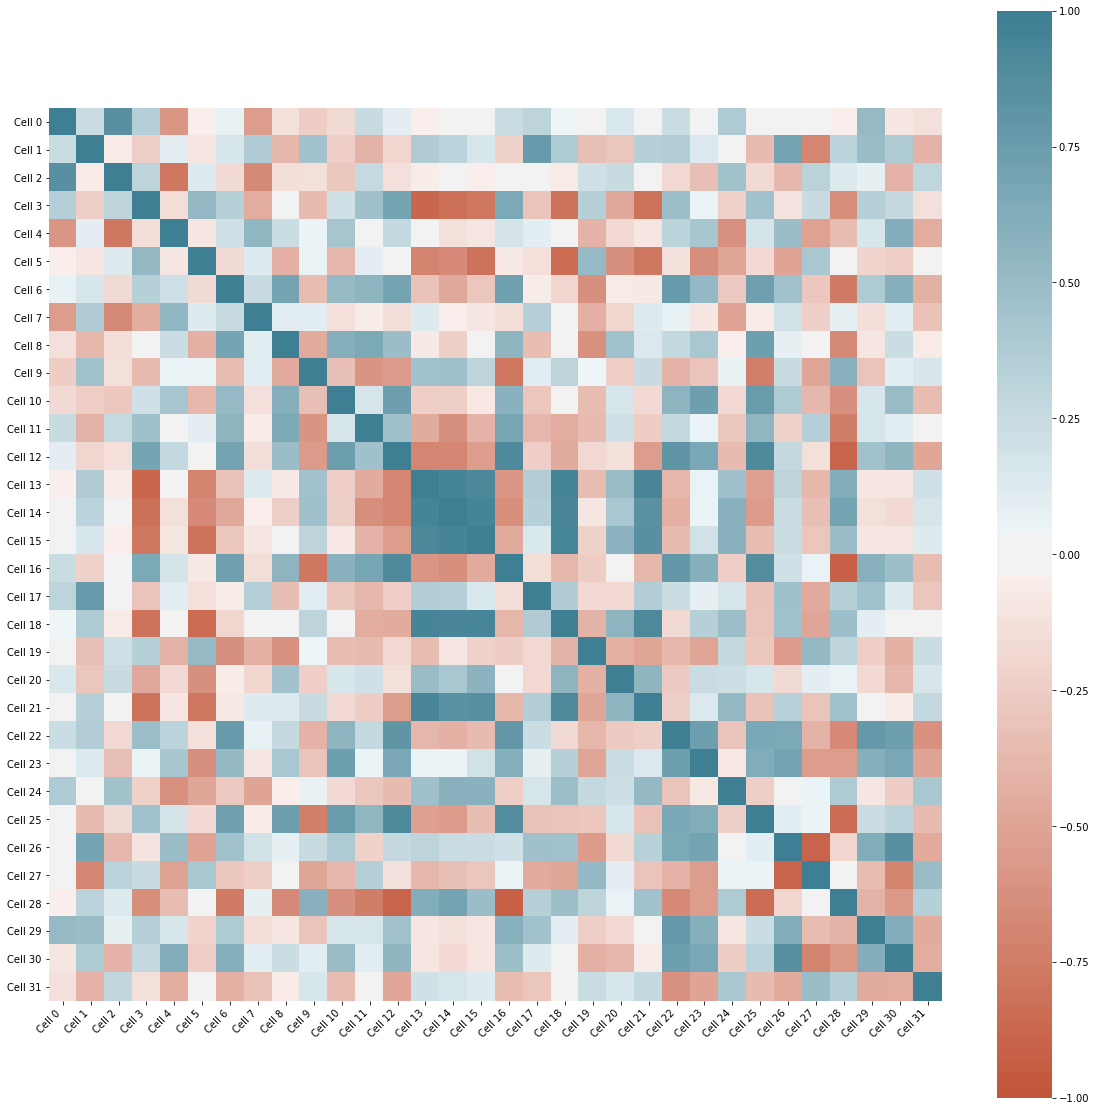

In [23]:
corr = cell_df.corr()

plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);